In [49]:
# Install and import necessary libraries
import os
import warnings
warnings.filterwarnings('ignore')

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from wordcloud import WordCloud
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' data package using nltk.download()
nltk.download('punkt_tab') # Downloading the necessary resource 'punkt_tab' for NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [50]:
# Load dataset
try:
    data_path = '/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv'
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the path and try again.")
    exit()

# Inspect data
print(data.head())
print(data.info())

Dataset loaded successfully.
                                              Review  Sentiment
0  Fast shipping but this product is very cheaply...          1
1  This case takes so long to ship and it's not e...          1
2  Good for not droids. Not good for iPhones. You...          1
3  The cable was not compatible between my macboo...          1
4  The case is nice but did not have a glow light...          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [51]:
# Drop missing values
data.dropna(subset=['Review', 'Sentiment'], inplace=True)
print(f"Dataset after dropping missing values: {data.shape}")

Dataset after dropping missing values: (24999, 2)


In [52]:
# Convert Sentiment labels
data['Sentiment'] = data['Sentiment'].apply(lambda x: 0 if x <= 3 else 1)

In [53]:
# Text cleaning function
stop_words = set(stopwords.words('english'))
def clean_review(review):
    tokens = word_tokenize(review.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

data['Cleaned_Review'] = data['Review'].astype(str).apply(clean_review)
print(data.head())

                                              Review  Sentiment  \
0  Fast shipping but this product is very cheaply...          0   
1  This case takes so long to ship and it's not e...          0   
2  Good for not droids. Not good for iPhones. You...          0   
3  The cable was not compatible between my macboo...          0   
4  The case is nice but did not have a glow light...          0   

                                      Cleaned_Review  
0  fast shipping product cheaply made brought gra...  
1           case takes long ship even worth dont buy  
2  good droids good iphones use features watch ip...  
3  cable compatible macbook iphone also connector...  
4  case nice glow light disappointed product meet...  


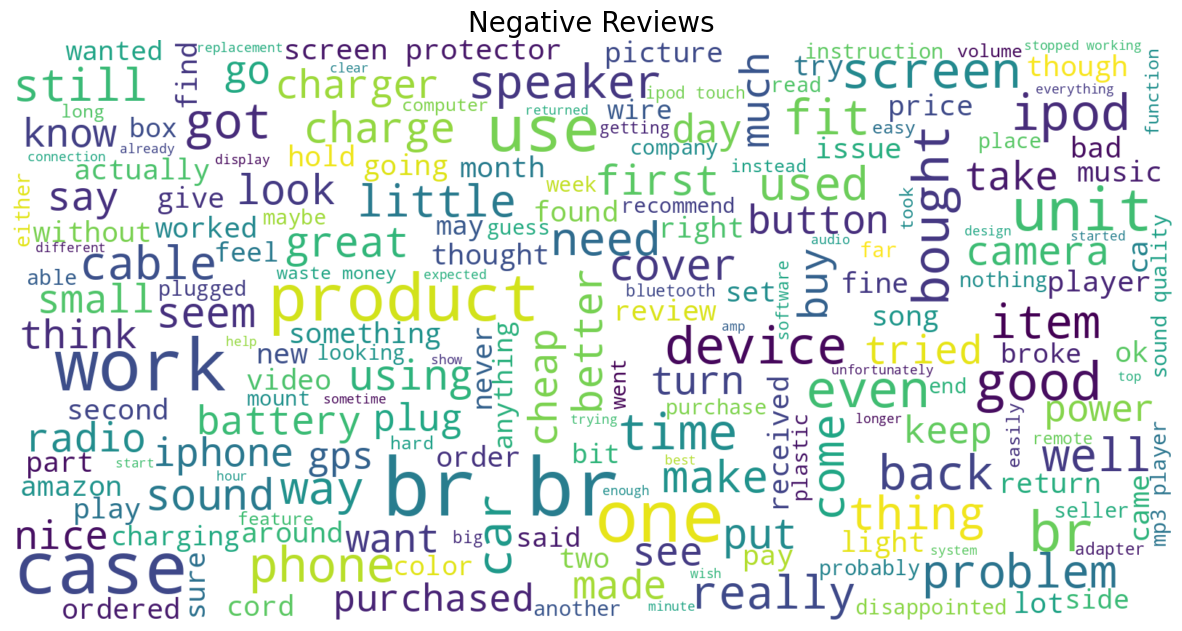

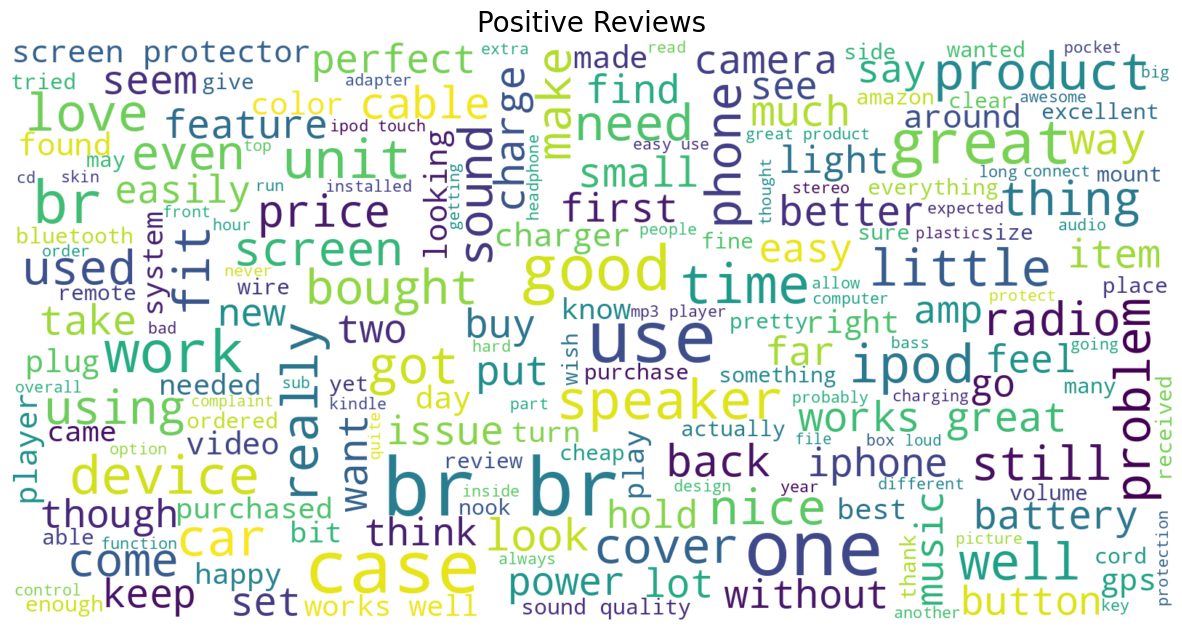

In [54]:
# Generate WordClouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110, background_color="white").generate(text)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

negative_reviews = ' '.join(data[data['Sentiment'] == 0]['Cleaned_Review'])
positive_reviews = ' '.join(data[data['Sentiment'] == 1]['Cleaned_Review'])
generate_wordcloud(negative_reviews, "Negative Reviews")
generate_wordcloud(positive_reviews, "Positive Reviews")

In [55]:
# Text vectorization
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']

In [56]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [57]:
# Evaluate model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      3750
           1       0.80      0.72      0.76      2500

    accuracy                           0.82      6250
   macro avg       0.81      0.80      0.81      6250
weighted avg       0.82      0.82      0.81      6250



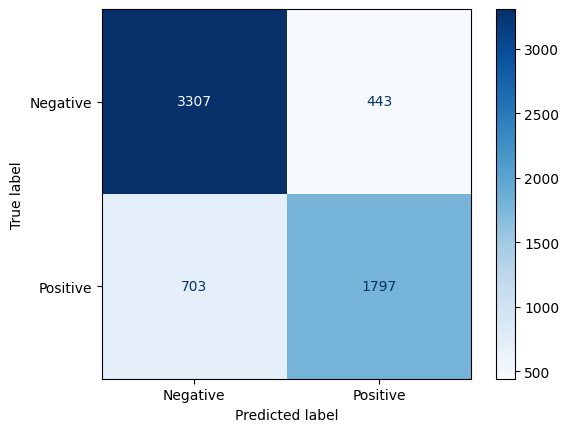

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [59]:
# Save model (optional)
import pickle
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
print("Model saved successfully.")

Model saved successfully.
